## **Importing dataset from kaggle**

In [1]:
!pip install -q opendatasets

import opendatasets as od
import pandas as pd

# insert ypu kaggle  username and key
#pddf = pd.read_csv('/content/dish-network-hackathon/Test_Dataset.csv')

In [2]:
od.download('https://www.kaggle.com/datasets/jangedoo/utkface-new')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: iamthulasiraman
Your Kaggle Key: ··········


100%|██████████| 331M/331M [00:04<00:00, 79.4MB/s]


## **Importing required Libralies**

In [66]:
import pandas as pd
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import plotly.express as px

In [6]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta, Adamax, RMSprop

In [7]:
fls = "utkface-new/UTKFace"

In [9]:
import os
from tqdm import tqdm

## **Plotting the image**

In [10]:
files = os.listdir(fls)

In [13]:
imge   = []
for i in tqdm(files):
    tot = fls+'/'+i
    image = cv2.imread(tot)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (48,48))
    imge.append(image)



100%|██████████| 23708/23708 [00:12<00:00, 1831.29it/s]


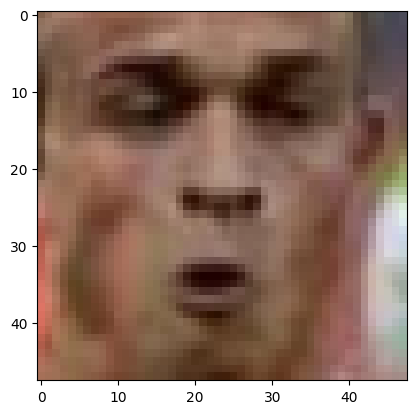

In [14]:
plt.imshow(imge[108])

## Splitting the age and gender from exixting data

In [15]:
age    = []
gender = []
for i in files:
    age.append(int(i.split('_')[0]))
    gender.append(int(i.split('_')[1]))

In [16]:
images_f = np.array(imge)

## Creating DataFrame

In [51]:
df = pd.DataFrame(age , columns = ['Age'])

In [52]:
df['gender'] = gender

In [53]:
lst = []
for i in files:
    lst.append(fls+'/'+i)

In [54]:
df['img_path'] = lst

In [58]:
df

,Age,gender,img_path
0,49,1,utkface-new/UTKFace/49_1_0_20170117154443925.j...
1,1,1,utkface-new/UTKFace/1_1_0_20170109194410994.jp...
2,50,1,utkface-new/UTKFace/50_1_0_20170110123120845.j...
3,90,0,utkface-new/UTKFace/90_0_0_20170111221647621.j...
4,1,0,utkface-new/UTKFace/1_0_0_20161219203657925.jp...
...,...,...,...
23703,28,0,utkface-new/UTKFace/28_0_3_20170119194622939.j...
23704,47,0,utkface-new/UTKFace/47_0_0_20170116205559481.j...
23705,38,1,utkface-new/UTKFace/38_1_0_20170103182017326.j...
23706,50,0,utkface-new/UTKFace/50_0_0_20170120134018751.j...


### **Plotting age column**

In [59]:
import seaborn as sns

<ipython-input-61-f3f27700bdbf>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Age', ylabel='Density'>

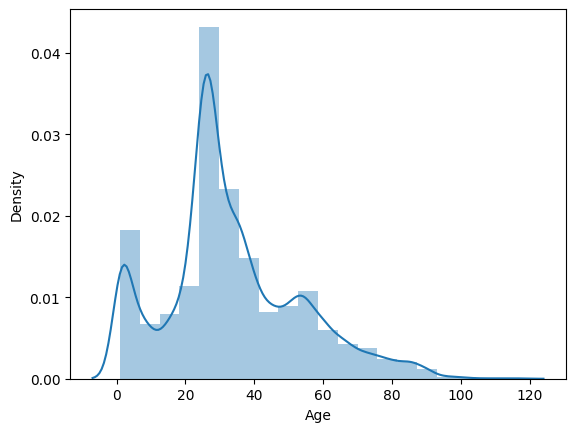

In [61]:
sns.distplot(df['Age'],kde=True, bins=20)

### **Plotting Gender column**

<Axes: xlabel='gender', ylabel='count'>

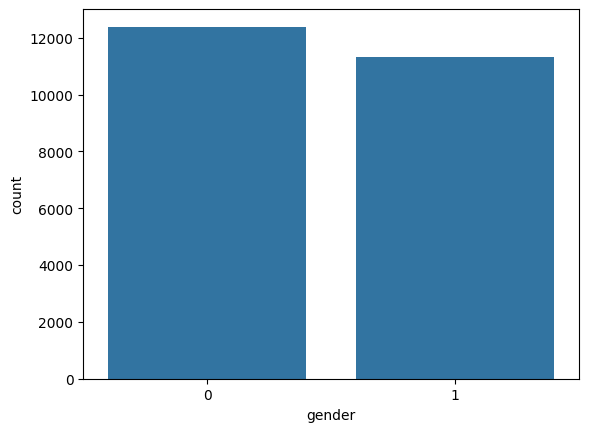

In [76]:
sns.countplot(x = 'gender',data = df)

In [ ]:
df.shape

(23708, 3)

In [ ]:
labels = []
for i in df.values:
    labels.append([i[0],i[1]])

In [ ]:
labels_f = np.array(labels)

In [ ]:
images_f_2 = images_f/255

In [ ]:
images_f_2.shape

(23708, 48, 48, 3)

# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(images_f_2,labels_f,test_size = 0.25)

In [ ]:
Y_train[:5]

array([[61,  0],
       [32,  0],
       [26,  0],
       [34,  0],
       [22,  0]])

In [ ]:
Y_train_2 = [Y_train[:,1],Y_train[:,0]]
Y_test_2 = [Y_test[:,1],Y_test[:,0]]

In [ ]:
Y_train_2

[array([0, 0, 0, ..., 1, 1, 1]), array([61, 32, 26, ..., 42, 24, 35])]

In [ ]:
Y_train_2[0][:5]

array([0, 0, 0, 0, 0])

# **Building the Model**

In [ ]:
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [ ]:
def model(input_shape):
    inputs = Input((input_shape))
    conv_1 = Convolution(inputs,32)
    maxp_1 = MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2 = Convolution(maxp_1,64)
    maxp_2 = MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3 = Convolution(maxp_2,128)
    maxp_3 = MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4 = Convolution(maxp_3,256)
    maxp_4 = MaxPooling2D(pool_size=(2,2))(conv_4)
    conv_5 = Convolution(maxp_4,512)
    maxp_5 = MaxPooling2D(pool_size=(2,2))(conv_5)


    flatten = Flatten()(maxp_5)
    dense_1 = Dense(64,activation='sigmoid')(flatten)
    dense_2 = Dense(64,activation='ReLU')(flatten)

    dropout_1 = Dropout(0.2)(dense_1)
    dropout_2 = Dropout(0.2)(dense_2)

    output_1 = Dense(1,activation='sigmoid',name='sex_out')(dropout_1)
    output_2 = Dense(1,activation='ReLU',name='age_out')(dropout_2)

    model = Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=['binary_crossentropy','Huber'],optimizer='Adam',metrics=['accuracy'])
    return model



In [ ]:
model = model((48,48,3))

In [ ]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv2d_20 (Conv2D)          (None, 48, 48, 32)           896       ['input_5[0][0]']             
                                                                                                  
 dropout_28 (Dropout)        (None, 48, 48, 32)           0         ['conv2d_20[0][0]']           
                                                                                                  
 activation_20 (Activation)  (None, 48, 48, 32)           0         ['dropout_28[0][0]']          
                                                                                            

In [ ]:
type(model)

keras.src.engine.functional.Functional

## **Training the Model with train data**

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
fle_s='Age_sex_Detection.h5'
checkpoint=ModelCheckpoint(fle_s,mointor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')

In [ ]:
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

In [ ]:
History=model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=300,callbacks=callback_list)

Epoch 1/300
278/278 [==============================] - ETA: 0s - loss: 16.4757 - sex_out_loss: 0.7154 - age_out_loss: 15.4739 - sex_out_accuracy: 0.5087 - age_out_accuracy: 0.0459
Epoch 1: val_loss improved from inf to 17.44702, saving model to Age_sex_Detection.h5
278/278 [==============================] - 9s 22ms/step - loss: 16.4757 - sex_out_loss: 0.7154 - age_out_loss: 15.4739 - sex_out_accuracy: 0.5087 - age_out_accuracy: 0.0459 - val_loss: 17.4470 - val_sex_out_loss: 0.6834 - val_age_out_loss: 16.5331 - val_sex_out_accuracy: 0.6087 - val_age_out_accuracy: 0.0515
Epoch 2/300
278/278 [==============================] - ETA: 0s - loss: 13.5771 - sex_out_loss: 0.6751 - age_out_loss: 12.6404 - sex_out_accuracy: 0.5803 - age_out_accuracy: 0.0458
Epoch 2: val_loss improved from 17.44702 to 13.62497, saving model to Age_sex_Detection.h5
278/278 [==============================] - 5s 18ms/step - loss: 13.5771 - sex_out_loss: 0.6751 - age_out_loss: 12.6404 - sex_out_accuracy: 0.5803 - age_o

## **Evaluate the model**

In [ ]:
model.evaluate(X_test,Y_test_2)

186/186 [==============================] - 1s 5ms/step - loss: 6.7733 - sex_out_loss: 0.2494 - age_out_loss: 5.5707 - sex_out_accuracy: 0.8935 - age_out_accuracy: 0.0510


[6.773324012756348,
 0.24944204092025757,
 5.570687294006348,
 0.8935380578041077,
 0.05095326527953148]

## Predict using the Created model

In [ ]:
pred = model.predict(X_test)

186/186 [==============================] - 1s 3ms/step


In [ ]:
pred[1]

array([[51.83792 ],
       [54.134148],
       [55.9806  ],
       ...,
       [28.267897],
       [50.915955],
       [20.35792 ]], dtype=float32)

## **Plotting the Result**

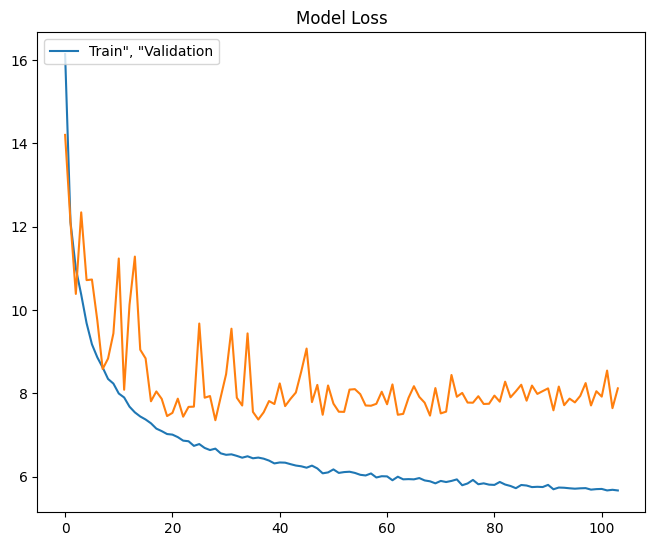

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train", "Validation'], loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

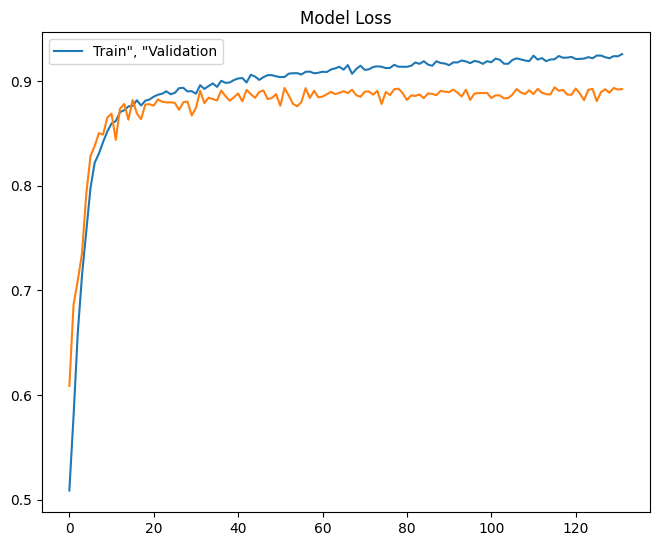

In [ ]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train", "Validation'], loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

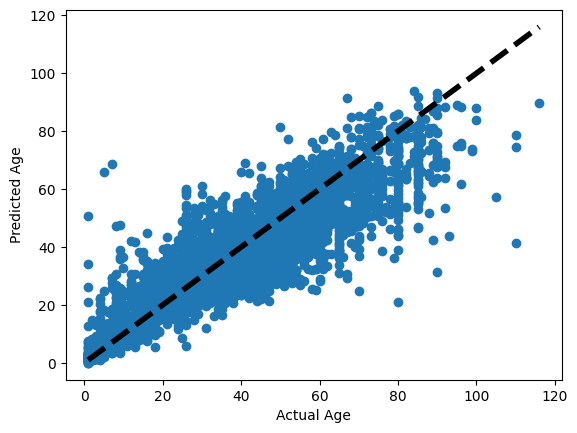

In [ ]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()], [Y_test_2[1].min(),Y_test_2[1].max()], 'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

In [ ]:
i=0
Pred_l=[]
while(i<len(pred[0])):
  Pred_l.append(int(np.round(pred[0][i])))
  i=i+1



## **Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
report=classification_report(Y_test_2[0], Pred_l)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      3116
           1       0.87      0.91      0.89      2811

    accuracy                           0.89      5927
   macro avg       0.89      0.89      0.89      5927
weighted avg       0.89      0.89      0.89      5927



In [ ]:
result = confusion_matrix(Y_test_2[0],Pred_l)

## **Plotting the Confusion matrix with Heat Map**

<Axes: >

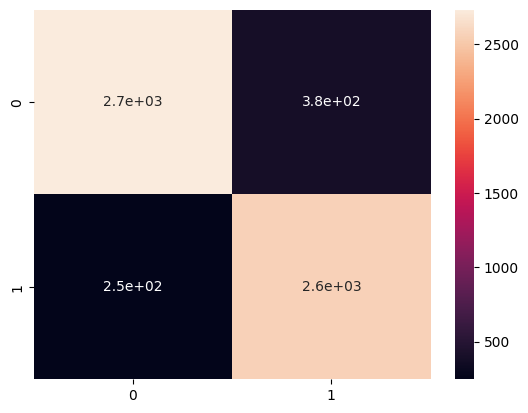

In [ ]:
import seaborn as sns
sns.heatmap(result,annot = True)

## **Testing the model with images**

In [ ]:
def test_image(ind, images_f,images_f_2, Model):
  plt.imshow(images_f[ind])
  image_test=images_f_2[ind]
  pred_l=Model.predict(np.array([image_test]))
  sex_f=['Male','Female']
  age=int(np.round(pred_l[1][0]))
  sex=int(np.round(pred_l[0][0]))
  print("Predicted Age is "+ str(age))
  print("Predicted Gender is "+ sex_f[sex])

1/1 [==============================] - 0s 18ms/step
Predicted Age is 10
Predicted Gender is Female


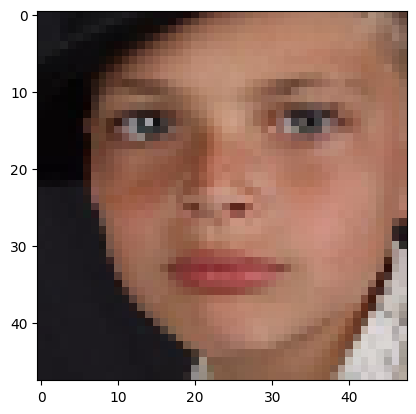

In [ ]:
test_image(9,images_f,images_f_2, model)

1/1 [==============================] - 0s 31ms/step
Predicted Age is 26
Predicted Gender is Male


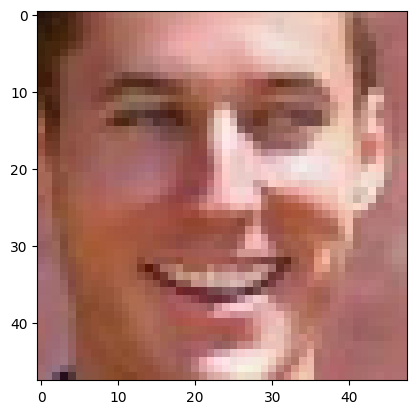

In [ ]:
test_image(400,images_f,images_f_2, model)

1/1 [==============================] - 0s 20ms/step
Predicted Age is 89
Predicted Gender is Female


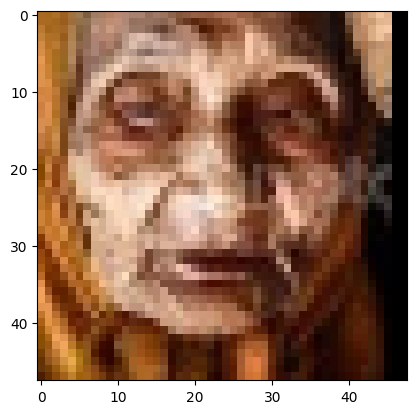

In [ ]:
test_image(23000,images_f,images_f_2, model)

1/1 [==============================] - 0s 27ms/step
Predicted Age is 37
Predicted Gender is Female


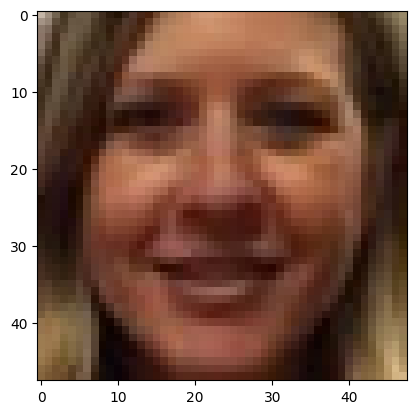

In [ ]:
test_image(1200,images_f,images_f_2, model)